### Application - Stock Market Value Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/AAPL.csv').values
dataset

array([['2019-05-20', 45.880001, 46.087502, ..., 45.772499, 44.174915,
        154449200],
       ['2019-05-21', 46.305, 47.0, ..., 46.650002, 45.02179, 113459200],
       ['2019-05-22', 46.165001, 46.427502, ..., 45.695, 44.100124,
        118994400],
       ...,
       ['2024-05-15', 187.910004, 190.649994, ..., 189.720001,
        189.720001, 70400000],
       ['2024-05-16', 190.470001, 191.100006, ..., 189.839996,
        189.839996, 52845200],
       ['2024-05-17', 189.509995, 190.809998, ..., 189.869995,
        189.869995, 41260800]], dtype=object)

In [ ]:
open_value=dataset[:,1]
open_value

array([45.880001, 46.305, 46.165001, ..., 187.910004, 190.470001,
       189.509995], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

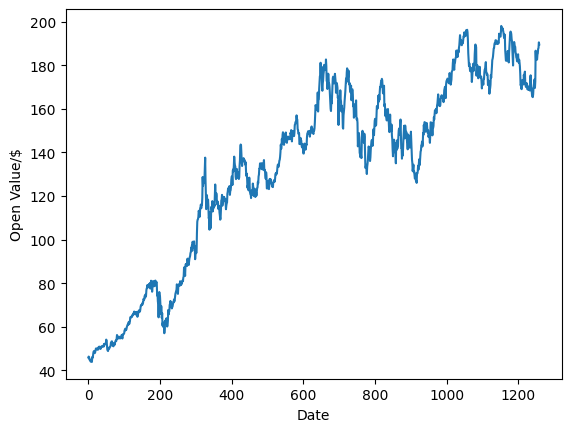

In [ ]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show

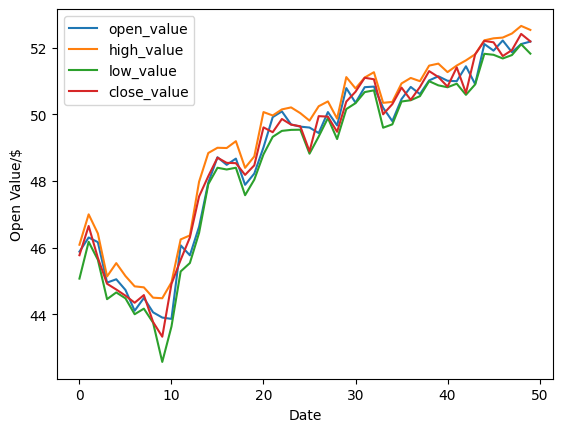

In [ ]:
high_value=dataset[:,2]
low_value=dataset[:,3]
close_value=dataset[:,4]

plt.plot(open_value[:50],label='open_value')
plt.plot(high_value[:50],label='high_value')
plt.plot(low_value[:50],label='low_value')
plt.plot(close_value[:50],label='close_value')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [ ]:
print(open_value[:100])

[45.880001 46.305 46.165001 44.950001 45.049999 44.73 44.105 44.487499
 44.057499 43.900002 43.860001 46.07 45.77 46.627499 47.952499 48.715
 48.487499 48.674999 47.887501 48.224998 49.012501 49.919998 50.092499
 49.700001 49.634998 49.607498 49.442501 50.072498 49.669998 50.7925
 50.352501 50.82 50.837502 50.202499 49.799999 50.462502 50.827499
 50.612499 51.022499 51.147499 51.012501 51.0 51.447498 50.912498
 52.115002 51.9175 52.2225 51.869999 52.115002 52.189999 54.105 53.474998
 51.3825 49.497501 49.077499 48.852501 50.049999 50.325001 49.904999
 50.255001 50.790001 50.865002 51.07 52.654999 52.720001 53.247501
 53.297501 52.357498 51.465 51.965 51.025002 52.125 52.540001 51.607498
 52.0975 53.0 53.512501 53.709999 53.465 54.517502 56.200001 55.0
 54.432499 54.990002 55.264999 55.502499 55.345001 54.737499 55.2575
 54.637501 55.0 55.134998 55.224998 56.267502 55.764999 54.607498 56.41
 56.567501 56.455002 56.7575]


In [ ]:
open_value=open_value.reshape(-1,1)
print(open_value[:100])

[[45.880001]
 [46.305]
 [46.165001]
 [44.950001]
 [45.049999]
 [44.73]
 [44.105]
 [44.487499]
 [44.057499]
 [43.900002]
 [43.860001]
 [46.07]
 [45.77]
 [46.627499]
 [47.952499]
 [48.715]
 [48.487499]
 [48.674999]
 [47.887501]
 [48.224998]
 [49.012501]
 [49.919998]
 [50.092499]
 [49.700001]
 [49.634998]
 [49.607498]
 [49.442501]
 [50.072498]
 [49.669998]
 [50.7925]
 [50.352501]
 [50.82]
 [50.837502]
 [50.202499]
 [49.799999]
 [50.462502]
 [50.827499]
 [50.612499]
 [51.022499]
 [51.147499]
 [51.012501]
 [51.0]
 [51.447498]
 [50.912498]
 [52.115002]
 [51.9175]
 [52.2225]
 [51.869999]
 [52.115002]
 [52.189999]
 [54.105]
 [53.474998]
 [51.3825]
 [49.497501]
 [49.077499]
 [48.852501]
 [50.049999]
 [50.325001]
 [49.904999]
 [50.255001]
 [50.790001]
 [50.865002]
 [51.07]
 [52.654999]
 [52.720001]
 [53.247501]
 [53.297501]
 [52.357498]
 [51.465]
 [51.965]
 [51.025002]
 [52.125]
 [52.540001]
 [51.607498]
 [52.0975]
 [53.0]
 [53.512501]
 [53.709999]
 [53.465]
 [54.517502]
 [56.200001]
 [55.0]
 [5

In [ ]:
open_value=open_value.reshape(-1,1) #convering into a column vector
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)

print(open_value[:5].T)
print(scaled_open_value[:5].T)

[[45.880001 46.305 46.165001 44.950001 45.049999]]
[[0.01310327 0.01586014 0.014952   0.00707058 0.00771924]]


In [ ]:
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/stock-scaler.sav')

['/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/stock-scaler.sav']

In [ ]:
open_value.shape

(1259, 1)

### Features and Labels

In [ ]:
data=[]
target=[]

window_size=50

for i in range(0, len(open_value)-window_size):
  data.append(scaled_open_value[i:i+window_size])
  target.append(scaled_open_value[i+window_size])

In [ ]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(1209, 50, 1)
(1209, 1)


In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/data',data)
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/target',target)

In [ ]:
print(data_np[0])

[[0.01310327]
 [0.01586014]
 [0.014952  ]
 [0.00707058]
 [0.00771924]
 [0.00564348]
 [0.00158925]
 [0.00407043]
 [0.00128112]
 [0.00025948]
 [0.        ]
 [0.01433575]
 [0.01238972]
 [0.01795211]
 [0.02654708]
 [0.03149325]
 [0.0300175 ]
 [0.03123377]
 [0.02612545]
 [0.02831472]
 [0.03342307]
 [0.03930979]
 [0.04042876]
 [0.03788272]
 [0.03746106]
 [0.03728267]
 [0.03621238]
 [0.04029902]
 [0.0376881 ]
 [0.0449695 ]
 [0.04211533]
 [0.04514789]
 [0.04526142]
 [0.04114231]
 [0.03853138]
 [0.04282888]
 [0.04519654]
 [0.04380188]
 [0.04646145]
 [0.0472723 ]
 [0.0463966 ]
 [0.04631551]
 [0.04921832]
 [0.0457479 ]
 [0.05354827]
 [0.05226712]
 [0.05424558]
 [0.05195899]
 [0.05354827]
 [0.05403476]]


In [ ]:
print(target[0])

[0.06645692]


### Traning

In [ ]:
import numpy as np
data=np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/data.npy')
target=np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/target.npy')

In [ ]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(1000, 50, 1)
(1000, 1)
(209, 50, 1)
(209, 1)


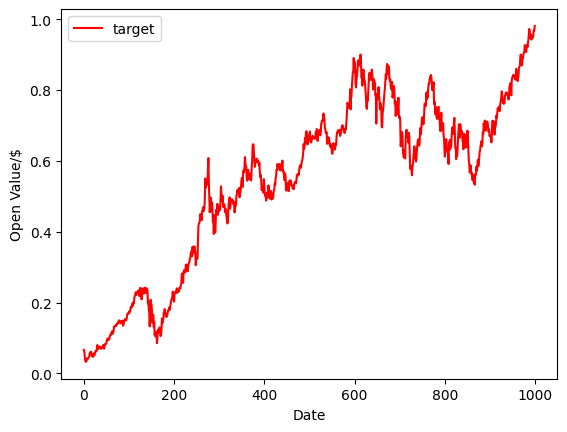

In [ ]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='target')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

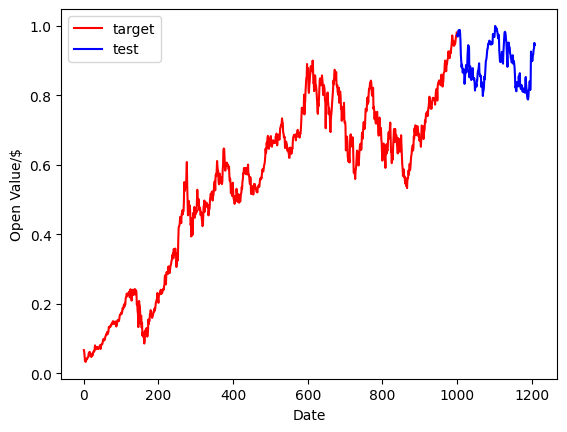

In [ ]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='target')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential()
model.add(LSTM(units=96,return_sequences=True,input_shape=(50,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=40,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [ ]:
history=model.fit(train_data,train_target,epochs=50,validation_data=(test_data,test_target))

Epoch 1/50
32/32 [==============================] - 19s 274ms/step - loss: 0.0435 - val_loss: 0.0024
Epoch 2/50
32/32 [==============================] - 5s 156ms/step - loss: 0.0071 - val_loss: 0.0024
Epoch 3/50
32/32 [==============================] - 6s 202ms/step - loss: 0.0080 - val_loss: 0.0023
Epoch 4/50
32/32 [==============================] - 9s 267ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 5/50
32/32 [==============================] - 5s 152ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 6/50
32/32 [==============================] - 5s 172ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 7/50
32/32 [==============================] - 9s 278ms/step - loss: 0.0056 - val_loss: 0.0040
Epoch 8/50
32/32 [==============================] - 14s 426ms/step - loss: 0.0054 - val_loss: 0.0020
Epoch 9/50
32/32 [==============================] - 9s 292ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 10/50
32/32 [==============================] - 10s 298ms/step - loss: 0.0054 - val_loss: 0.0

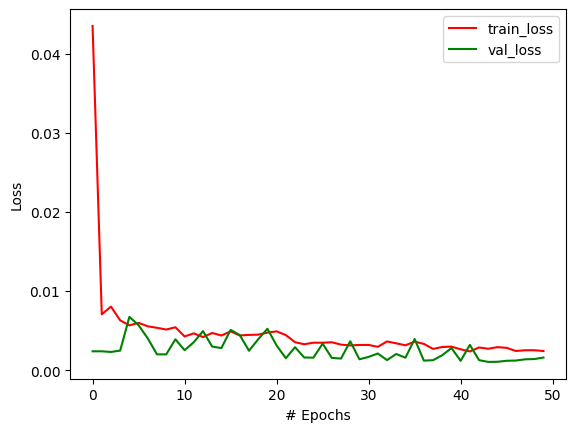

In [ ]:
plt.plot(history.history['loss'],'r',label='train_loss')
plt.plot(history.history['val_loss'],'g',label='val_loss')
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
result=model.predict(test_data)
from sklearn.metrics import r2_score
r2=r2_score(test_target,result)
print('r2 score: ', r2)

7/7 [==============================] - 2s 44ms/step
r2 score:  0.49941290818891193


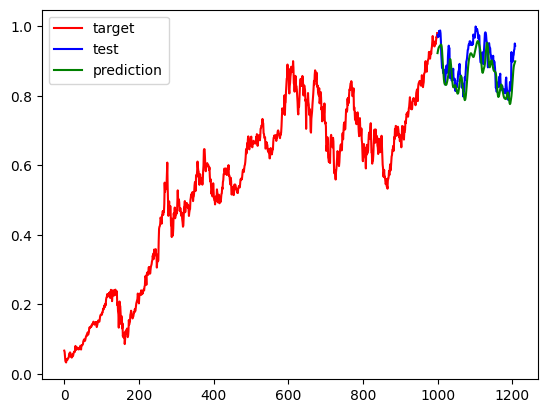

In [ ]:
test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='target')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='prediction')
plt.legend()
plt.show()

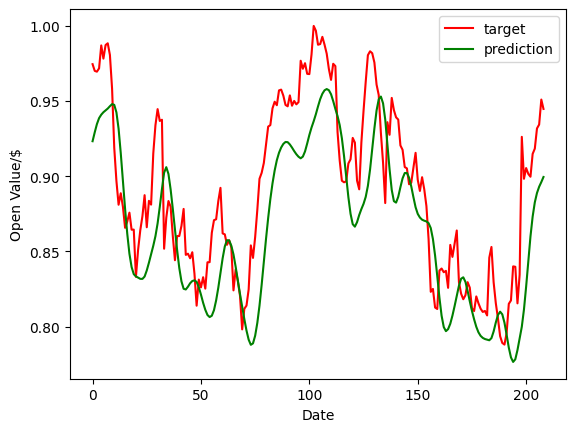

In [ ]:
plt.plot(test_target,'r',label='target')
plt.plot(result,'g',label='prediction')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/LSTM-Stock-Market.model')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/LSTM-Stock-Market.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/LSTM-Stock-Market.model')

In [4]:
import joblib
scaler=joblib.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/RNN/stock-scaler.sav')

In [13]:
import numpy as np
test_data=np.array([
    12.34, 56.78, 90.12, 34.56, 78.90,
    23.45, 67.89, 12.34, 56.78, 90.12,
    34.56, 78.90, 23.45, 67.89, 12.34,
    56.78, 90.12, 34.56, 78.90, 23.45,
    67.89, 12.34, 56.78, 90.12, 34.56,
    78.90, 23.45, 67.89, 12.34, 56.78,
    90.12, 34.56, 78.90, 23.45, 67.89,
    12.34, 56.78, 90.12, 34.56, 78.90,
    23.45, 67.89, 12.34, 56.78, 90.12,
    34.56, 78.90, 23.45, 67.89, 12.34
])
print(test_data.shape)

(50,)


In [15]:
test_data=test_data.reshape(-1,1)
print(test_data.shape)

(50, 1)


In [16]:
test_data=scaler.transform(test_data)

In [ ]:
# import numpy as np

# test_data = np.array([60.6424, 34.444])

# # Reshape the array to (1, 50) by repeating the original array
# reshaped_data = np.tile(test_data, 25).reshape(1, 50)

# print(reshaped_data)
# print(reshaped_data.shape)


In [ ]:
# test_data=scaler.transform(test_data)

ValueError: Expected 2D array, got 1D array instead:
array=[60.6424 34.444 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
test_data=test_data.reshape(1,50,1)
print(test_data.shape)

result=model.predict(test_data)
print(result)

(1, 50, 1)
1/1 [==============================] - 3s 3s/step
[[0.06806076]]


In [19]:
transform_result=scaler.inverse_transform(result)
print(transform_result[0][0])

54.352245
